In this problem i scraaped a data from a public website to sell properties or any thing u want 
i scrapped the appartments in cairo with its districts to predict the good price with the apartment features to list it 

In [1]:
import joblib
import time
import mysql.connector
from datetime import date
from dateutil.relativedelta import relativedelta
from datetime import datetime, timedelta
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(rc={'figure.figsize': [9, 9]}, font_scale=1.2)

In [2]:
ads,url_stack=joblib.load('state.pkl')


In [3]:

df=pd.DataFrame.from_records(ads)
df.drop(['url'],axis=1,inplace=True)
df

# df = pd.read_csv('olx_data_36K_V2.csv')
# df

,title,date,Location,Compound,Type,Price,Area (m²),Bedrooms,Level,Furnished,Price Type,Bathrooms,Payment Option,Description,Amenities,Delivery Term,Delivery Date,Down Payment
0,شقة للبيع بسكن مصر الاندلس مسلسل 1,2 months ago,New Cairo - El Tagamoa,2020 Compound,Apartment,"175,000",115,3,3,No,Price,1,Cash,شقة لقطة للبيع بسكن مصر الاندلس دور متكرر فيو ...,Landline; Natural Gas; Water Meter; Electricit...,NaN,NaN,NaN
1,سكن مصر الأندلس مرحله ١ للبيع شقه دور اول ١١٥,2 weeks ago,New Cairo - El Tagamoa,NaN,Apartment,"180,000",115,3,1,No,Price,1,Cash,للبيع دور اول\nفيو تحفه\nالأوفر ١٨٠ الف لسرعه ...,Natural Gas; Water Meter; Electricity Meter; S...,Finished,Ready to move,NaN
2,لقطه سكن مصر التجمع التالت افر 150 الف,1 month ago,New Cairo - El Tagamoa,NaN,Apartment,"150,000",115,3,2,No,Price,1,Cash,للبيت شقه سكن مصر التجمع التالت مسلسل 9\nمرحله...,NaN,Finished,Ready to move,NaN
3,شقة للبيع بمدينة عمر بن الخطاب - آخر جسر السويس,2 days ago,New Cairo - El Tagamoa,NaN,Apartment,"450,000",135,3,7,No,Negotiable,1,Cash,شقة عبارة عن نصف دور بها عدد 3 جهاز تكييف وسخا...,Elevator; Natural Gas; Balcony,Finished,Ready to move,NaN
4,لسرعه البيع شقه سكن مصر التجمع التالت,1 month ago,New Cairo - El Tagamoa,NaN,Apartment,"160,000",115,3,2,No,Price,1,Cash,لقطه لسرعه البيع شقه سكن مصر التجمع التالت مسل...,NaN,Finished,Ready to move,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37704,شقة للبيع إمتداد مدينة 15 مايو مساحة 125م,1 month ago,15 May City,NaN,Apartment,"550,000",125,3,2,NaN,Negotiable,1,NaN,شقة للبيع إمتداد مدينة 15 مايو مساحة 125م \...,NaN,Core & Shell,Ready to move,NaN
37705,شقة للبيع بكمبوند دار مصر دور ثالث,1 week ago,15 May City,Dar Misr,Apartment,"600,000",140,3,3,No,Negotiable,3,NaN,شقة للبيع بكمبوند دار مصر 15 مايو دور ثالث بحر...,NaN,Finished,Ready to move,"600,000"
37706,شقه للبيع,2 months ago,15 May City,NaN,Apartment,"470,000",80,2,5,No,Negotiable,1,Cash,شقه للبيع بارقي مكان بالإسكندرية أبراج رمادا ب...,Elevator; Natural Gas; Water Meter; Electricit...,Finished,Ready to move,NaN
37707,للبيع,2 months ago,15 May City,NaN,Apartment,"470,000",100,2,4,No,Price,1,Cash,شقة للبيع بمدينة ١٥ مايو مجاورة ٥ \nقريبة من ج...,Landline; Water Meter; Electricity Meter; Pets...,Finished,Ready to move,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37709 entries, 0 to 37708
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   title           37709 non-null  object
 1   date            37709 non-null  object
 2   Location        37709 non-null  object
 3   Compound        13610 non-null  object
 4   Type            37709 non-null  object
 5   Price           37709 non-null  object
 6   Area (m²)       37709 non-null  object
 7   Bedrooms        37709 non-null  object
 8   Level           37709 non-null  object
 9   Furnished       28677 non-null  object
 10  Price Type      37709 non-null  object
 11  Bathrooms       37709 non-null  object
 12  Payment Option  33569 non-null  object
 13  Description     37709 non-null  object
 14  Amenities       28301 non-null  object
 15  Delivery Term   25879 non-null  object
 16  Delivery Date   28539 non-null  object
 17  Down Payment    10286 non-null  object
dtypes: obj

# Filling missing Values  loading
all missing values filling written here

In [5]:
df['Delivery Term'].replace('Finished',1, inplace=True)
df['Delivery Term'].replace('Not Finished',0 ,inplace = True)
df['Delivery Term'].replace('Semi Finished',0.5 ,inplace = True)
df['Delivery Term'].replace('Core & Shell',0.75 ,inplace = True)
df['Delivery Term'].unique()

array([ nan, 1.  , 0.  , 0.5 , 0.75])

In [6]:
# df['amenities'].isna().sum()
imputer = SimpleImputer(strategy='constant',fill_value='')

imputer2 = SimpleImputer(strategy='constant',fill_value='Cash')
imputer3 = SimpleImputer(strategy='constant',fill_value='Ready to move')
imputer4 = SimpleImputer(strategy='constant',fill_value=0)
imputer5 = SimpleImputer(strategy='most_frequent')
imputer6 = KNNImputer(n_neighbors=4)

df[['Amenities']] = imputer.fit_transform(df[['Amenities']])
#df[['Delivery Date']] = imputer3.fit_transform(df[['Delivery Date']])
df[['Down Payment']] = imputer4.fit_transform(df[['Down Payment']])
#df[['Furnished']] = imputer5.fit_transform(df[['Furnished']])

#df[['Delivery Term']] = imputer6.fit_transform(df[['Delivery Term']])
df[['Payment Option']] = imputer2.fit_transform(df[['Payment Option']])

In [7]:
df.isna().sum()

title                 0
date                  0
Location              0
Compound          24099
Type                  0
Price                 0
Area (m²)             0
Bedrooms              0
Level                 0
Furnished          9032
Price Type            0
Bathrooms             0
Payment Option        0
Description           0
Amenities             0
Delivery Term     11830
Delivery Date      9170
Down Payment          0
dtype: int64

In [8]:
#df.dropna(axis = 0, inplace=True)

payment option converting 0 to 'Cash'

In [9]:
df[df['Payment Option']==0]='Cash'

In [10]:
df['Payment Option'].unique()

array(['Cash', 'Installment', 'Cash or Installment'], dtype=object)

Down payment conversion from string to int 

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37709 entries, 0 to 37708
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   title           37709 non-null  object
 1   date            37709 non-null  object
 2   Location        37709 non-null  object
 3   Compound        13610 non-null  object
 4   Type            37709 non-null  object
 5   Price           37709 non-null  object
 6   Area (m²)       37709 non-null  object
 7   Bedrooms        37709 non-null  object
 8   Level           37709 non-null  object
 9   Furnished       28677 non-null  object
 10  Price Type      37709 non-null  object
 11  Bathrooms       37709 non-null  object
 12  Payment Option  37709 non-null  object
 13  Description     37709 non-null  object
 14  Amenities       37709 non-null  object
 15  Delivery Term   25879 non-null  object
 16  Delivery Date   28539 non-null  object
 17  Down Payment    37709 non-null  object
dtypes: obj

In [12]:
df["Down Payment"] = [float(str(i).replace(",", "")) for i in df["Down Payment"]]
df['Down Payment']=df['Down Payment'].astype(int)  

In [13]:
df['Delivery Term'].astype(str)
df['Delivery Term'].replace(1,'Finished', inplace=True)
df['Delivery Term'].replace(0,'Not Finished' ,inplace = True)
df['Delivery Term'].replace(0.5,'Semi Finished' ,inplace = True)
df['Delivery Term'].replace(0.75,'Core & Shell' ,inplace = True)
df['Delivery Term'].replace(0.7807295490552185,'Core & Shell',inplace = True)


Replacing 10+ with Highest

In [14]:
df['Level'].replace('10+','Highest',inplace=True)


In [15]:
df['Delivery Term'].value_counts()

Finished         15325
Semi Finished     8046
Not Finished      1366
Core & Shell      1142
Name: Delivery Term, dtype: int64

In [16]:
df.isna().sum()


title                 0
date                  0
Location              0
Compound          24099
Type                  0
Price                 0
Area (m²)             0
Bedrooms              0
Level                 0
Furnished          9032
Price Type            0
Bathrooms             0
Payment Option        0
Description           0
Amenities             0
Delivery Term     11830
Delivery Date      9170
Down Payment          0
dtype: int64

# amenities

In [17]:
list_ament=['Electricity Meter', 'Balcony','Water Meter','Elevator',
            'Security','Natural Gas','Landline','Pets Allowed','Covered Parking',
            'Private Garden','Pool','Maids Room','Central A/C & heating',
            'Built in Kitchen Appliances']

ls1 = ['مياة', 'عداد كهرباء','غاز','تكييف مركزي','مصعد','حمام سباحه','جاردن','بلكونة']
ls2 = ['Water Meter', 'Electricity Meter', 'Natural Gas','Central A/C & heating','Elevator','Pool','Private Garden','Balcony']
mny_map = dict(zip(ls2, ls1))

def check_amenity(row, col):
    if col in row['Amenities'] or mny_map.get(col, 'none') in row['Description'] :
        return 1
    else:
        return 0

for col in list_ament:
    df[col] = df.apply(check_amenity, args=[col], axis=1) 

In [18]:
mny_map.get('Water Meter','none')

'مياة'

In [19]:
for x in list_ament:
    df[x]=df[x].replace(True,1)
    df[x]=df[x].replace(False,0)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37709 entries, 0 to 37708
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   title                        37709 non-null  object
 1   date                         37709 non-null  object
 2   Location                     37709 non-null  object
 3   Compound                     13610 non-null  object
 4   Type                         37709 non-null  object
 5   Price                        37709 non-null  object
 6   Area (m²)                    37709 non-null  object
 7   Bedrooms                     37709 non-null  object
 8   Level                        37709 non-null  object
 9   Furnished                    28677 non-null  object
 10  Price Type                   37709 non-null  object
 11  Bathrooms                    37709 non-null  object
 12  Payment Option               37709 non-null  object
 13  Description                  37

In [20]:
df['Water Meter'].value_counts()

1    19901
0    17808
Name: Water Meter, dtype: int64

In [21]:
df.rename({'Area_(m²)': 'Area'},inplace=True)
df.columns = df.columns.str.replace(' ','_')
df.rename(columns = {'area_(m²)':'Area','central_a/c_&_heating':'Central_AC_heating'}, inplace = True)
df.columns = df.columns.str.lower()
df.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37709 entries, 0 to 37708
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   title                        37709 non-null  object
 1   date                         37709 non-null  object
 2   location                     37709 non-null  object
 3   compound                     13610 non-null  object
 4   type                         37709 non-null  object
 5   price                        37709 non-null  object
 6   area_(m²)                    37709 non-null  object
 7   bedrooms                     37709 non-null  object
 8   level                        37709 non-null  object
 9   furnished                    28677 non-null  object
 10  price_type                   37709 non-null  object
 11  bathrooms                    37709 non-null  object
 12  payment_option               37709 non-null  object
 13  description                  37

In [22]:
df.rename({'Area_(m²)': 'Area'},inplace=True)
df.columns = df.columns.str.replace(' ','_')
df.rename(columns = {'area_(m²)':'Area','central_a/c_&_heating':'Central_AC_heating'}, inplace = True)
df.columns = df.columns.str.lower()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37709 entries, 0 to 37708
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   title                        37709 non-null  object
 1   date                         37709 non-null  object
 2   location                     37709 non-null  object
 3   compound                     13610 non-null  object
 4   type                         37709 non-null  object
 5   price                        37709 non-null  object
 6   area                         37709 non-null  object
 7   bedrooms                     37709 non-null  object
 8   level                        37709 non-null  object
 9   furnished                    28677 non-null  object
 10  price_type                   37709 non-null  object
 11  bathrooms                    37709 non-null  object
 12  payment_option               37709 non-null  object
 13  description                  37

# Compound

In [23]:
lse=list(df['compound'].unique())
lsa=[]
del lse[5]

In [24]:
del lse[1]

translate all compounds to arabic to search compound names in the describtion 

In [25]:
from deep_translator import GoogleTranslator
for i in lse:
    try:
        result = GoogleTranslator('auto','arabic').translate(i)
        lsa.append(result)
        #print(result) 
    except:
        print('sorry')

make dictionary for every english compound name to its arabic value

In [26]:
c_map = dict(zip(lse, lsa))
c_map

{'2020 Compound': 'كمبوند 2020',
 'Dar Misr': 'Dar Misr',
 'ALBA': 'ألبا',
 'Upville': 'أبفيل',
 'Andalus': 'الأندلس',
 'Zahret El Tagamo': 'زهرة التجمع',
 'Haram City': 'مدينة الهرم',
 'Al Diyar': 'Al Diyar',
 'Nakheel': 'Nakheel',
 'Light City': 'لايت سيتي',
 'Madinaty': 'مدينتي',
 'Stone Residence': 'ستون ريزيدنس',
 'Galleria Moon Valley': 'جاليريا مون فالى',
 'Amorada': 'أموردا',
 'Fifth Square': 'فيفث سكوير',
 'Al Burouj': 'Al Burouj',
 'Dreamland': 'ارض الاحلام',
 'Eastown': 'ايستاون',
 'Jayd': 'Jayd',
 'The Address East': 'العنوان الشرقي',
 'Al Riyadh Secon': 'Al Riyadh Secon',
 'Makany': 'مكاني',
 'Uptown Cairo': 'اب تاون كايرو',
 'Sun City': 'مدينة الشمس',
 'Baron City': 'بارون سيتي',
 'Rehab City': 'مدينة الرحاب',
 'Zizinia Gardens': 'حدائق زيزينيا',
 'Ritage': 'ريتاج',
 'Mivida': 'حياتي',
 'Mountain View iCity': 'ماونتن فيو اي سيتي',
 'Sun City Gardens': 'صن سيتى جاردنز',
 'El Khamayel': 'الخمائل',
 'GCR Golf City': 'جي سي ار جولف سيتي',
 'Highland Park': 'حديقة المرتفعات',


In [27]:
df['compound'].value_counts()

Madinaty               3286
Beit Al Watan           730
Dar Misr                603
Eastown                 569
Mountain View iCity     480
                       ... 
Katameya Heights          1
Grand Heights             1
Mirage City               1
Upside Maadi              1
Anakaji                   1
Name: compound, Length: 309, dtype: int64

change compound values to title or description values that found in them

In [28]:
def check_comp(row, col):
    if c_map.get(col, 'none') in row['description'] or c_map.get(col, 'none') in row['title'] :
        return col
    else:
        return row['compound']

for col in lse:
    df['compound'] = df.apply(check_comp, args=[col], axis=1)

In [29]:
df['compound'].isna().sum() #was 22915


15709

change null to not in compound

In [30]:
def no_null_comp(x):
    y=pd.isna(x)
    if y == True:
        return 'Not in Compound'
    else:
        return x
df['compound']=df['compound'].apply(no_null_comp)

In [31]:
df[df['compound']=='Not in Compound']

,title,date,location,compound,type,price,area,bedrooms,level,furnished,...,security,natural_gas,landline,pets_allowed,covered_parking,private_garden,pool,maids_room,central_ac_heating,built_in_kitchen_appliances
2,لقطه سكن مصر التجمع التالت افر 150 الف,1 month ago,New Cairo - El Tagamoa,Not in Compound,Apartment,"150,000",115,3,2,No,...,0,0,0,0,0,0,0,0,0,0
3,شقة للبيع بمدينة عمر بن الخطاب - آخر جسر السويس,2 days ago,New Cairo - El Tagamoa,Not in Compound,Apartment,"450,000",135,3,7,No,...,0,1,0,0,0,0,0,0,0,0
4,لسرعه البيع شقه سكن مصر التجمع التالت,1 month ago,New Cairo - El Tagamoa,Not in Compound,Apartment,"160,000",115,3,2,No,...,0,0,0,0,0,0,0,0,0,0
8,لقطه لسرعه البيع شقة سكن مصر هلي جنه مباشر,2 months ago,New Cairo - El Tagamoa,Not in Compound,Apartment,"135,000",115,3,2,No,...,0,0,0,0,0,0,0,0,0,0
10,شقة لقطة للبيع سكن مصر مسلسل13,2 months ago,New Cairo - El Tagamoa,Not in Compound,Apartment,"190,000",115,3,5,No,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37702,شقة بمجاورة ٢٢ فيو متميز بحري غير مجروحة نهائي...,1 month ago,15 May City,Not in Compound,Apartment,"520,000",120,3,4,NaN,...,0,1,0,0,0,0,0,0,0,0
37703,شقه للبيع تمليك مدينه ١٥ مايو,4 weeks ago,15 May City,Not in Compound,Apartment,"580,000",110,2,4,No,...,0,1,0,0,0,0,0,0,0,0
37704,شقة للبيع إمتداد مدينة 15 مايو مساحة 125م,1 month ago,15 May City,Not in Compound,Apartment,"550,000",125,3,2,NaN,...,0,0,0,0,0,0,0,0,0,0
37707,للبيع,2 months ago,15 May City,Not in Compound,Apartment,"470,000",100,2,4,No,...,0,0,1,1,0,1,0,0,0,0


In [32]:
df['compound'].value_counts()


Not in Compound     16014
Jewar                5094
Madinaty             2900
Beit Al Watan        1191
Sama                 1075
                    ...  
Go Heliopolis           1
Upville                 1
Creek Park              1
Stella New Cairo        1
Etlalah                 1
Name: compound, Length: 288, dtype: int64

In [33]:
indexes_of_Sakan=df.index[df['description'].str.contains('ماونتن فيو هايد بارك')].tolist()
len(indexes_of_Sakan)

107

We replaced nan values to sakan  masr from the known describtion 

In [34]:
indexes_of_Sakan=df.index[df['description'].str.contains('سكن مصر')].tolist()
indexes_of_Sakan2=df.index[df['title'].str.contains('سكن مصر')].tolist()

for i in indexes_of_Sakan:
    df['compound'][i]='Sakan Masr'
for i in indexes_of_Sakan2:
     df['compound'][i]='Sakan Masr'


C:\Users\Commandor\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\Commandor\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [35]:
for i in indexes_of_Sakan:
    df.loc[i,"compound"]="Sakan Masr"


All sakan masr in  Tgamo3 that's right :)

In [36]:
df[df['location']=='New Cairo - El Tagamoa'][df['compound']=='Sakan Masr']

C:\Users\Commandor\anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,title,date,location,compound,type,price,area,bedrooms,level,furnished,...,security,natural_gas,landline,pets_allowed,covered_parking,private_garden,pool,maids_room,central_ac_heating,built_in_kitchen_appliances
0,شقة للبيع بسكن مصر الاندلس مسلسل 1,2 months ago,New Cairo - El Tagamoa,Sakan Masr,Apartment,"175,000",115,3,3,No,...,1,1,1,1,1,1,0,0,0,0
1,سكن مصر الأندلس مرحله ١ للبيع شقه دور اول ١١٥,2 weeks ago,New Cairo - El Tagamoa,Sakan Masr,Apartment,"180,000",115,3,1,No,...,1,1,0,0,0,0,0,0,0,0
2,لقطه سكن مصر التجمع التالت افر 150 الف,1 month ago,New Cairo - El Tagamoa,Sakan Masr,Apartment,"150,000",115,3,2,No,...,0,0,0,0,0,0,0,0,0,0
4,لسرعه البيع شقه سكن مصر التجمع التالت,1 month ago,New Cairo - El Tagamoa,Sakan Masr,Apartment,"160,000",115,3,2,No,...,0,0,0,0,0,0,0,0,0,0
5,سكن مصر الأندلس ١١٥م للبيع بالمرحلة الاولى است...,1 month ago,New Cairo - El Tagamoa,Sakan Masr,Apartment,"190,000",115,3,1,No,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15445,شقه للبيع بسكن مصر التجمع,2 months ago,New Cairo - El Tagamoa,Sakan Masr,Apartment,"310,000",115,3,4,Yes,...,0,0,0,0,0,0,0,0,0,0
15450,شقه بسكن مصر الاندلس القاهرة الجديدة للبيع,1 month ago,New Cairo - El Tagamoa,Sakan Masr,Apartment,"517,000",115,3,5,Yes,...,1,1,1,0,0,0,0,0,0,0
15451,شقه للبيع بمشروع سكن مصر اكتوبر الداون تاون,3 weeks ago,New Cairo - El Tagamoa,Sakan Masr,Apartment,"400,000",115,3,4,Yes,...,0,0,0,0,0,0,0,0,0,1
15457,شقة للبيع سكن مصر القاهرة الجديدة,2 months ago,New Cairo - El Tagamoa,Sakan Masr,Apartment,"550,000",106,3,Ground,NaN,...,0,1,0,0,0,0,0,0,0,0


In [37]:
df[(df['compound'].isna()) & (df['location']=='New Cairo - El Tagamoa')]

,title,date,location,compound,type,price,area,bedrooms,level,furnished,...,security,natural_gas,landline,pets_allowed,covered_parking,private_garden,pool,maids_room,central_ac_heating,built_in_kitchen_appliances


In [38]:
df[df['location']=='Gesr Al Suez']

,title,date,location,compound,type,price,area,bedrooms,level,furnished,...,security,natural_gas,landline,pets_allowed,covered_parking,private_garden,pool,maids_room,central_ac_heating,built_in_kitchen_appliances
26675,شقه للبيع تلاته غرفه,3 months ago,Gesr Al Suez,Not in Compound,Apartment,"65,000",130,3,1,No,...,0,1,0,0,0,0,0,0,0,0
26676,شقه بالعجمي للبدل بسياره,3 months ago,Gesr Al Suez,Sama,Apartment,"160,000",90,2,10,No,...,0,0,0,0,0,0,0,0,0,0
26677,شقة للبيع كاش أو بالتقسيط,3 months ago,Gesr Al Suez,Not in Compound,Apartment,"50,000",150,3,4,No,...,1,1,1,0,1,0,0,0,0,1
26678,شقة تسليم مفتاح,2 months ago,Gesr Al Suez,Not in Compound,Apartment,"30,000",65,2,3,NaN,...,0,0,1,0,0,0,0,0,0,0
26679,شقة للبيع بشارع جمال عبد الناصر جسر السويس الق...,2 months ago,Gesr Al Suez,Not in Compound,Apartment,"170,000",80,2,7,NaN,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27884,شقه للبيع با اجمل موقع بجسر السويس امام عمارات...,1 month ago,Gesr Al Suez,Not in Compound,Apartment,"1,400,000",170,3,10,No,...,1,0,0,0,0,0,0,0,0,0
27885,شقه للبيع فى مدينتى بدون عموووله,2 months ago,Gesr Al Suez,Madinaty,Apartment,"1,300,000",77,2,2,NaN,...,0,0,0,0,0,0,0,0,0,0
27886,شقه بميدان الحجازمصرالجديده١٨٠م,2 months ago,Gesr Al Suez,Not in Compound,Apartment,"1,650,000",180,3,1,NaN,...,0,0,0,0,0,0,0,0,0,0
27887,شقه للبيع في الاميريه شارع نجم ١٦٠ متر,2 months ago,Gesr Al Suez,Not in Compound,Apartment,"1,588,855",160,3,9,NaN,...,0,0,0,0,0,0,0,0,0,0


In [39]:
indexes_of_Sakan=df.index[df['description'].str.contains('جسر السويس')].tolist()
indexes_of_Sakan2=df.index[df['title'].str.contains('جسر السويس')].tolist()

x=len(indexes_of_Sakan)+len(indexes_of_Sakan2)
x-1214

352

# Location errors

In [40]:
list_of_locations=df['location'].unique().tolist()
list_of_locations

['New Cairo - El Tagamoa',
 'Madinaty',
 'New Capital City',
 'Nasr City',
 'Rehab City',
 'Shorouk City',
 'Maadi',
 'Obour City',
 'Heliopolis',
 'Zahraa Al Maadi',
 'Mokattam',
 'Ain Shams',
 'Gesr Al Suez',
 'Badr City',
 'Downtown Cairo',
 'Helwan',
 'Mostakbal City',
 'Helmeyat El Zaytoun',
 'New Heliopolis',
 'Sheraton',
 'Salam City',
 'New Nozha',
 'Katameya',
 'Shubra',
 'Hadayek al-Kobba',
 'Hadayek Helwan',
 'Matareya',
 'Marg',
 'Dar al-Salaam',
 'Ezbet El Nakhl',
 'Zawya al-Hamra',
 'Waili',
 'Al Manial',
 'Zamalek',
 'Almazah',
 'Abasiya',
 'Sayeda Zeinab',
 'Basateen',
 'Al Amiriyyah',
 '15 May City']

make dictionaries for every location value and make a value in arabic that equals to it

In [41]:
loc1 = ['التجمع','مدينتي','العاصمه','مدينة نصر','الرحاب','الشروق','معادي','العبور','مصر الجديده','زهراء المعادي','مقطم','عين شمس','جسر السويس','بدر','وسط البلد','حلوان','مدينة المستقبل','حلمية الزاتون','شيراتون','مدينة السلام','النزهه الجديده','قطاميه','شبرا','حدائق القبه','حدائق حلوان','مطريه','المرج','دار السلام','عزبة النخل','الزاويه الحمرا','الوايلي','المنيل','الزمالك','الماظه','عباسيه','سيده زينب','بستين','الامريه','15 مايو']
loc2 = ['New Cairo - El Tagamoa','Madinaty','New Capital City','Nasr City','Rehab City','Shorouk City','Maadi','Obour City','Heliopolis','Zahraa Al Maadi','Mokattam','Ain Shams','Gesr Al Suez','Badr City','Downtown Cairo','Helwan','Mostakbal City','Helmeyat El Zaytoun','Sheraton','Salam City','New Nozha','Katameya','Shubra','Hadayek al-Kobba','Hadayek Helwan','Matareya','Marg','Dar al-Salaam','Ezbet El Nakhl','Zawya al-Hamra','Waili','Al Manial','Zamalek','Almazah','Abasiya','Sayeda Zeinab','Basateen','Al Amiriyyah','15 May City']
mini_map = dict(zip(loc2, loc1))
mini_map
list_of_locations

['New Cairo - El Tagamoa',
 'Madinaty',
 'New Capital City',
 'Nasr City',
 'Rehab City',
 'Shorouk City',
 'Maadi',
 'Obour City',
 'Heliopolis',
 'Zahraa Al Maadi',
 'Mokattam',
 'Ain Shams',
 'Gesr Al Suez',
 'Badr City',
 'Downtown Cairo',
 'Helwan',
 'Mostakbal City',
 'Helmeyat El Zaytoun',
 'New Heliopolis',
 'Sheraton',
 'Salam City',
 'New Nozha',
 'Katameya',
 'Shubra',
 'Hadayek al-Kobba',
 'Hadayek Helwan',
 'Matareya',
 'Marg',
 'Dar al-Salaam',
 'Ezbet El Nakhl',
 'Zawya al-Hamra',
 'Waili',
 'Al Manial',
 'Zamalek',
 'Almazah',
 'Abasiya',
 'Sayeda Zeinab',
 'Basateen',
 'Al Amiriyyah',
 '15 May City']

In [42]:
df['location'].value_counts()

New Cairo - El Tagamoa    15621
Madinaty                   3545
Heliopolis                 1665
Zahraa Al Maadi            1350
Mokattam                   1267
Ain Shams                  1260
Gesr Al Suez               1214
Badr City                  1078
Helwan                      811
Downtown Cairo              810
Helmeyat El Zaytoun         765
Mostakbal City              720
Nasr City                   719
New Heliopolis              594
New Capital City            491
Sheraton                    451
Salam City                  450
Katameya                    434
Hadayek al-Kobba            406
Shubra                      405
New Nozha                   404
Hadayek Helwan              360
Marg                        315
Matareya                    315
Dar al-Salaam               225
Shorouk City                223
Maadi                       218
Obour City                  193
Ezbet El Nakhl              180
Zawya al-Hamra              180
15 May City                 179
Waili   

if found an arabic value in description or title columns that equals to the values in the directory --> change the value in location to the value key which is the value in english 

In [43]:
def check_loc(row, col):
    if mini_map.get(col, 'none') in row['description'] or mini_map.get(col, 'none') in row['title'] :
        return col
    else:
        return row['location']

for col in list_of_locations:
    df['location'] = df.apply(check_loc, args=[col], axis=1) 

In [44]:
df['location'].value_counts()

New Cairo - El Tagamoa    12948
Madinaty                   3818
Badr City                  1684
Gesr Al Suez               1561
Heliopolis                 1332
Rehab City                 1250
Mokattam                   1224
Nasr City                  1174
Ain Shams                  1118
Zahraa Al Maadi            1084
Helwan                      848
Mostakbal City              750
New Capital City            705
Maadi                       677
Downtown Cairo              641
Helmeyat El Zaytoun         611
Shorouk City                578
Katameya                    496
Sheraton                    467
Shubra                      464
Salam City                  429
Hadayek al-Kobba            394
Marg                        373
Obour City                  364
New Nozha                   357
Hadayek Helwan              346
Matareya                    324
New Heliopolis              291
Dar al-Salaam               199
Ezbet El Nakhl              196
15 May City                 193
Zawya al

In [45]:
# def newHtoH(row):
#     if row['location'] == 'New Heliopolis' :
#         return 'Heliopolis'
#     else:
#         return row['location']

# df['location'] = df.apply(newHtoH, axis=1) 

In [46]:
df['location'].value_counts()

New Cairo - El Tagamoa    12948
Madinaty                   3818
Badr City                  1684
Gesr Al Suez               1561
Heliopolis                 1332
Rehab City                 1250
Mokattam                   1224
Nasr City                  1174
Ain Shams                  1118
Zahraa Al Maadi            1084
Helwan                      848
Mostakbal City              750
New Capital City            705
Maadi                       677
Downtown Cairo              641
Helmeyat El Zaytoun         611
Shorouk City                578
Katameya                    496
Sheraton                    467
Shubra                      464
Salam City                  429
Hadayek al-Kobba            394
Marg                        373
Obour City                  364
New Nozha                   357
Hadayek Helwan              346
Matareya                    324
New Heliopolis              291
Dar al-Salaam               199
Ezbet El Nakhl              196
15 May City                 193
Zawya al

In [47]:
indexes_of_Sakan2=df.index[df['title'].str.contains('الشروق')].tolist()
len(indexes_of_Sakan2)
# for i in indexes_of_Sakan2es_of_Sakan2:
#     df['title'][indexes_of_Sakan2[i]]

247

In [48]:
df['date']

0        2 months ago
1         2 weeks ago
2         1 month ago
3          2 days ago
4         1 month ago
             ...     
37704     1 month ago
37705      1 week ago
37706    2 months ago
37707    2 months ago
37708     3 weeks ago
Name: date, Length: 37709, dtype: object

Working with the date column to make the date from "1 month ago "  to "22/5/2022"

In [49]:
def date_correct(x):

    after_split= x.split(' ')
    if ('days' or 'day') in after_split[1]:
        listing_date = date.today() + relativedelta(days=-int(after_split[0]))
        return(str(listing_date))
    
    elif ('months' or 'month') in after_split[1] :
        listing_date = date.today() + relativedelta(months=-int(after_split[0]))
        
        return(str(listing_date))
    elif('weeks' or 'week') in after_split[1] :
        listing_date = date.today() + relativedelta(weeks=-int(after_split[0]))
        return(str(listing_date))
    else :  
        return(str(date.today()))
        
    

In [50]:
df['date'] = df['date'].apply(date_correct)


In [51]:
df['date']

0        2022-03-20
1        2022-05-06
2        2022-05-20
3        2022-05-18
4        2022-05-20
            ...    
37704    2022-05-20
37705    2022-05-20
37706    2022-03-20
37707    2022-03-20
37708    2022-04-29
Name: date, Length: 37709, dtype: object

## Convert date to datetime object

In [52]:
df['date']=pd.to_datetime(df['date'],format='%Y/%m/%d')

Extract month from column date

In [53]:
df['month']=df['date'].apply(lambda x: x.month)

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37709 entries, 0 to 37708
Data columns (total 33 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   title                        37709 non-null  object        
 1   date                         37709 non-null  datetime64[ns]
 2   location                     37709 non-null  object        
 3   compound                     37709 non-null  object        
 4   type                         37709 non-null  object        
 5   price                        37709 non-null  object        
 6   area                         37709 non-null  object        
 7   bedrooms                     37709 non-null  object        
 8   level                        37709 non-null  object        
 9   furnished                    28677 non-null  object        
 10  price_type                   37709 non-null  object        
 11  bathrooms                    37709 non-nu

converting Price from string to integers and thier was a problem with 100','000 this comma so we tried to replace it with non space to make it convertable

In [55]:
df["price"] = [float(str(i).replace(",", "")) for i in df["price"]]
df['price']=df['price'].astype(int) 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37709 entries, 0 to 37708
Data columns (total 33 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   title                        37709 non-null  object        
 1   date                         37709 non-null  datetime64[ns]
 2   location                     37709 non-null  object        
 3   compound                     37709 non-null  object        
 4   type                         37709 non-null  object        
 5   price                        37709 non-null  int32         
 6   area                         37709 non-null  object        
 7   bedrooms                     37709 non-null  object        
 8   level                        37709 non-null  object        
 9   furnished                    28677 non-null  object        
 10  price_type                   37709 non-null  object        
 11  bathrooms                    37709 non-nu

In [56]:
df['price'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37709 entries, 0 to 37708
Data columns (total 33 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   title                        37709 non-null  object        
 1   date                         37709 non-null  datetime64[ns]
 2   location                     37709 non-null  object        
 3   compound                     37709 non-null  object        
 4   type                         37709 non-null  object        
 5   price                        37709 non-null  int32         
 6   area                         37709 non-null  object        
 7   bedrooms                     37709 non-null  object        
 8   level                        37709 non-null  object        
 9   furnished                    28677 non-null  object        
 10  price_type                   37709 non-null  object        
 11  bathrooms                    37709 non-nu

## converting area to integer to make it valid to make computations

In [57]:
df["area"] = [float(str(i).replace(",", "")) for i in df["area"]]
df['area']=df['area'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37709 entries, 0 to 37708
Data columns (total 33 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   title                        37709 non-null  object        
 1   date                         37709 non-null  datetime64[ns]
 2   location                     37709 non-null  object        
 3   compound                     37709 non-null  object        
 4   type                         37709 non-null  object        
 5   price                        37709 non-null  int32         
 6   area                         37709 non-null  int32         
 7   bedrooms                     37709 non-null  object        
 8   level                        37709 non-null  object        
 9   furnished                    28677 non-null  object        
 10  price_type                   37709 non-null  object        
 11  bathrooms                    37709 non-nu

Amenities extraction and make nan values = '''' to make it All false

In [58]:
# df['Amenities'].isna().sum()
# imputer = SimpleImputer(strategy='constant',fill_value='')
# df[['Amenities']] = imputer.fit_transform(df[['Amenities']])
# #df[['compound']] = imputer.fit_transform(df[['compound']])


# imputer2 = SimpleImputer(strategy='constant',fill_value='Cash')
# df[['Payment Option']] = imputer2.fit_transform(df[['Payment Option']])

In [59]:
# list_ament=['Electricity Meter', 'Balcony','Water Meter','Elevator',
#             'Security','Natural Gas','Landline','Pets Allowed','Covered Parking',
#             'Private Garden','Pool','Maids Room','Central A/C & heating',
#             'Built in Kitchen Appliances']

# for col in list_ament:

#     df[col] = df['amenities'].str.contains(col) 
 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37709 entries, 0 to 37708
Data columns (total 33 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   title                        37709 non-null  object        
 1   date                         37709 non-null  datetime64[ns]
 2   location                     37709 non-null  object        
 3   compound                     37709 non-null  object        
 4   type                         37709 non-null  object        
 5   price                        37709 non-null  int32         
 6   area                         37709 non-null  int32         
 7   bedrooms                     37709 non-null  object        
 8   level                        37709 non-null  object        
 9   furnished                    28677 non-null  object        
 10  price_type                   37709 non-null  object        
 11  bathrooms                    37709 non-nu

In [60]:
df.isna().sum()

title                              0
date                               0
location                           0
compound                           0
type                               0
price                              0
area                               0
bedrooms                           0
level                              0
furnished                       9032
price_type                         0
bathrooms                          0
payment_option                     0
description                        0
amenities                          0
delivery_term                  11830
delivery_date                   9170
down_payment                       0
electricity_meter                  0
balcony                            0
water_meter                        0
elevator                           0
security                           0
natural_gas                        0
landline                           0
pets_allowed                       0
covered_parking                    0
p

Replacing Price value in column Price Type to Not Negotiable

In [61]:
df['price_type'].unique()

array(['Price', 'Negotiable'], dtype=object)

In [62]:
df['price_type'] = [i.replace("Price", "Not Negotiable") for i in df['price_type']]


In [63]:
df['price_type'].unique()

array(['Not Negotiable', 'Negotiable'], dtype=object)

In [64]:
df = df.drop_duplicates()
df

,title,date,location,compound,type,price,area,bedrooms,level,furnished,...,natural_gas,landline,pets_allowed,covered_parking,private_garden,pool,maids_room,central_ac_heating,built_in_kitchen_appliances,month
0,شقة للبيع بسكن مصر الاندلس مسلسل 1,2022-03-20,New Cairo - El Tagamoa,Sakan Masr,Apartment,175000,115,3,3,No,...,1,1,1,1,1,0,0,0,0,3
1,سكن مصر الأندلس مرحله ١ للبيع شقه دور اول ١١٥,2022-05-06,New Cairo - El Tagamoa,Sakan Masr,Apartment,180000,115,3,1,No,...,1,0,0,0,0,0,0,0,0,5
2,لقطه سكن مصر التجمع التالت افر 150 الف,2022-05-20,New Cairo - El Tagamoa,Sakan Masr,Apartment,150000,115,3,2,No,...,0,0,0,0,0,0,0,0,0,5
3,شقة للبيع بمدينة عمر بن الخطاب - آخر جسر السويس,2022-05-18,Gesr Al Suez,Not in Compound,Apartment,450000,135,3,7,No,...,1,0,0,0,0,0,0,0,0,5
4,لسرعه البيع شقه سكن مصر التجمع التالت,2022-05-20,New Cairo - El Tagamoa,Sakan Masr,Apartment,160000,115,3,2,No,...,0,0,0,0,0,0,0,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37704,شقة للبيع إمتداد مدينة 15 مايو مساحة 125م,2022-05-20,15 May City,Not in Compound,Apartment,550000,125,3,2,NaN,...,0,0,0,0,0,0,0,0,0,5
37705,شقة للبيع بكمبوند دار مصر دور ثالث,2022-05-20,15 May City,Dar Misr,Apartment,600000,140,3,3,No,...,0,0,0,0,0,0,0,0,0,5
37706,شقه للبيع,2022-03-20,15 May City,Jewar,Apartment,470000,80,2,5,No,...,1,0,0,0,0,0,0,0,0,3
37707,للبيع,2022-03-20,15 May City,Not in Compound,Apartment,470000,100,2,4,No,...,0,1,1,0,1,0,0,0,0,3


## Price per meter calaculations

In [65]:
df["area"] = [float(str(i).replace(",", "")) for i in df["area"]]
df['area']=df['area'].astype(int)
df['meterprice']=df['price']/df['area']
df['meterprice']=df['meterprice'].astype(int)
df

C:\Users\Commandor\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Commandor\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Commandor\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See th

,title,date,location,compound,type,price,area,bedrooms,level,furnished,...,landline,pets_allowed,covered_parking,private_garden,pool,maids_room,central_ac_heating,built_in_kitchen_appliances,month,meterprice
0,شقة للبيع بسكن مصر الاندلس مسلسل 1,2022-03-20,New Cairo - El Tagamoa,Sakan Masr,Apartment,175000,115,3,3,No,...,1,1,1,1,0,0,0,0,3,1521
1,سكن مصر الأندلس مرحله ١ للبيع شقه دور اول ١١٥,2022-05-06,New Cairo - El Tagamoa,Sakan Masr,Apartment,180000,115,3,1,No,...,0,0,0,0,0,0,0,0,5,1565
2,لقطه سكن مصر التجمع التالت افر 150 الف,2022-05-20,New Cairo - El Tagamoa,Sakan Masr,Apartment,150000,115,3,2,No,...,0,0,0,0,0,0,0,0,5,1304
3,شقة للبيع بمدينة عمر بن الخطاب - آخر جسر السويس,2022-05-18,Gesr Al Suez,Not in Compound,Apartment,450000,135,3,7,No,...,0,0,0,0,0,0,0,0,5,3333
4,لسرعه البيع شقه سكن مصر التجمع التالت,2022-05-20,New Cairo - El Tagamoa,Sakan Masr,Apartment,160000,115,3,2,No,...,0,0,0,0,0,0,0,0,5,1391
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37704,شقة للبيع إمتداد مدينة 15 مايو مساحة 125م,2022-05-20,15 May City,Not in Compound,Apartment,550000,125,3,2,NaN,...,0,0,0,0,0,0,0,0,5,4400
37705,شقة للبيع بكمبوند دار مصر دور ثالث,2022-05-20,15 May City,Dar Misr,Apartment,600000,140,3,3,No,...,0,0,0,0,0,0,0,0,5,4285
37706,شقه للبيع,2022-03-20,15 May City,Jewar,Apartment,470000,80,2,5,No,...,0,0,0,0,0,0,0,0,3,5875
37707,للبيع,2022-03-20,15 May City,Not in Compound,Apartment,470000,100,2,4,No,...,1,1,0,1,0,0,0,0,3,4700


## outlier detected

In [66]:
df[df['meterprice']<10]

,title,date,location,compound,type,price,area,bedrooms,level,furnished,...,landline,pets_allowed,covered_parking,private_garden,pool,maids_room,central_ac_heating,built_in_kitchen_appliances,month,meterprice
8107,بالعاصمه الاداريه شقه فندقيه فقط بمقدم 10% احج...,2022-02-20,New Capital City,La Verde,Apartment,230000,230000,3,2,No,...,1,1,1,1,1,1,1,0,2,1
8177,امتلك بالدور الاول 180م وحدتك بحري بالتجمع الخامس,2022-03-20,Madinaty,Madinaty,Apartment,270000,270000,3,2,No,...,1,1,1,0,1,1,0,0,3,1
15464,شقه ١٥٠ متر سوبر لوكس,2022-03-20,Gesr Al Suez,Not in Compound,Apartment,650000,150000,3,7,NaN,...,0,0,0,0,0,0,0,0,3,4
21195,شقة للبيع De Joya 2 بالقسط ع 10 سنوات,2022-05-20,Heliopolis,Not in Compound,Apartment,222000,222000,3,Ground,No,...,0,0,0,1,0,0,0,0,5,1
24106,شقة في زهراء المعادي,2022-05-20,Zahraa Al Maadi,Jewar,Apartment,2800000,441555,3,2,NaN,...,1,0,1,0,0,0,0,1,5,6
24396,شقة للبيع 135متر بالتقسيط بأرقى موقع بالحى الث...,2022-05-20,Mokattam,Not in Compound,Apartment,700000,700000,3,Ground,NaN,...,0,0,0,0,0,0,0,0,5,1
24594,شقه دور ارضي علوي بحديقه خاصه بالمقطم,2022-02-20,Mokattam,Jewar,Apartment,850000,192000,3,Ground,No,...,0,0,0,0,0,0,0,0,2,4
26009,شقه ب المهندسين,2022-03-20,Ain Shams,Not in Compound,Apartment,385000,1000000,1,8,No,...,0,0,0,0,0,0,0,0,3,0
27493,جسر السويس محطه برتي او مترو هشام بركات,2022-02-20,Gesr Al Suez,Jewar,Apartment,595000,595000,3,9,NaN,...,0,0,1,0,0,0,1,0,2,1
27935,بسعر محروووق شقة سكن مصر 116متر الأقرب للعاصمه...,2022-03-20,Badr City,Sakan Masr,Apartment,120000,115155,3,1,No,...,0,0,0,0,0,0,0,0,3,1


## outlier detected

In [67]:
df[df['down_payment']<0]

,title,date,location,compound,type,price,area,bedrooms,level,furnished,...,landline,pets_allowed,covered_parking,private_garden,pool,maids_room,central_ac_heating,built_in_kitchen_appliances,month,meterprice
1357,شقة للبيع 204 متر البنفسج السعر 2 مليون 500,2022-02-20,New Cairo - El Tagamoa,Sama,Apartment,2500000,204,3,2,No,...,1,0,1,0,0,0,0,0,2,12254
5421,شقة للبيع 190متر اللوتس الشمالية مليون 600,2022-03-20,New Cairo - El Tagamoa,Not in Compound,Apartment,1600000,190,3,4,No,...,1,1,1,0,0,0,0,0,3,8421
21797,شقه للبيع,2022-05-20,Gesr Al Suez,Not in Compound,Apartment,1350000,160,3,1,No,...,0,0,0,0,0,0,0,1,5,8437
26124,شقة للبيع الدور ٨ عمارة ١٢ دور تشطيب الترا سوب...,2022-04-22,Ain Shams,Not in Compound,Apartment,420000,130,3,8,No,...,1,1,0,0,0,0,0,1,4,3230
26456,شقه للبيع فرصه فى احمد عصمت بحرى على الشارع ال...,2022-03-20,Ain Shams,Jewar,Apartment,650000,145,3,2,Yes,...,0,1,0,0,0,0,0,0,3,4482
26658,شقه للبيع دور خامس 180م متشطبه سوبر لوكس,2022-04-22,Ain Shams,Arabella Village,Apartment,900000,180,2,5,No,...,1,0,0,0,0,0,0,0,4,5000
27974,شقة متشطبة تسليم فوري عمارات الأوقاف,2022-05-20,Badr City,Pukka,Apartment,120000,70,2,5,NaN,...,0,0,1,0,0,0,0,0,5,1714
28283,شقه بمدينه بدر,2022-03-20,Badr City,Jewar,Apartment,350000,97,3,5,No,...,0,0,0,0,0,0,0,0,3,3608
29786,شقه للبيع بحلوان,2022-03-20,Helwan,Not in Compound,Apartment,50000,110,2,4,No,...,1,0,0,0,0,0,0,0,3,454
30887,"بمقدم56ألف وقسط شهرى 7,500تقدر تمتلك شقة بأرقي...",2022-04-29,Mostakbal City,L’Avenir,Apartment,1124000,107,2,2,No,...,1,1,1,0,1,0,1,0,4,10504


In [68]:
def nega(row):
    if row['down_payment'] < 0 :
        return 0
    else:
        return row['down_payment']

df['down_payment'] = df.apply(nega, axis=1) 

C:\Users\Commandor\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


### outliers handling

In [69]:
df['area'].max()

1000000

In [70]:
df['meterprice'].max()

970588

In [71]:
df.columns

Index(['title', 'date', 'location', 'compound', 'type', 'price', 'area',
       'bedrooms', 'level', 'furnished', 'price_type', 'bathrooms',
       'payment_option', 'description', 'amenities', 'delivery_term',
       'delivery_date', 'down_payment', 'electricity_meter', 'balcony',
       'water_meter', 'elevator', 'security', 'natural_gas', 'landline',
       'pets_allowed', 'covered_parking', 'private_garden', 'pool',
       'maids_room', 'central_ac_heating', 'built_in_kitchen_appliances',
       'month', 'meterprice'],
      dtype='object')

boxplot before removing outliers

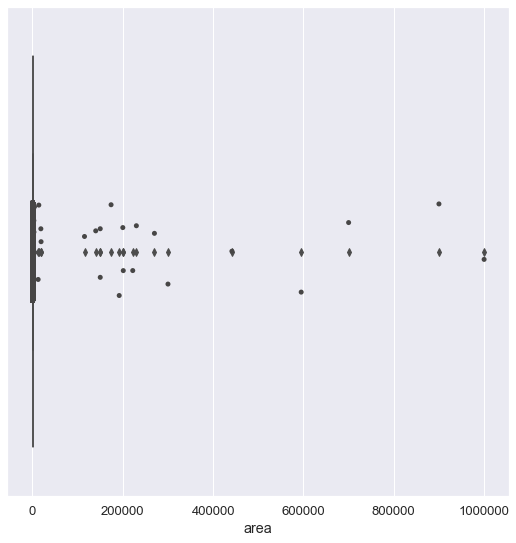

In [72]:
sns.boxplot(x='area', data=df)
sns.stripplot(x='area', data=df, color="#474646")

### droping outliers drops 9000 row because fill it with fake data will reduce the R2 in machine learning as we tried before

In [73]:
from datasist.structdata import detect_outliers
# idx = ['area','price','meterprice','down_payment']
# for col in idx:
#     outliers_indices = detect_outliers(df, 0, [col])
#     col_median = df[col].median()
#     df[col].iloc[outliers_indices] = col_median
idx = ['area','price','meterprice','down_payment']

outliers_indices = detect_outliers(df, 0, idx)
df.drop(outliers_indices, inplace=True)
df


C:\Users\Commandor\AppData\Roaming\Python\Python37\site-packages\pandas\core\frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,title,date,location,compound,type,price,area,bedrooms,level,furnished,...,landline,pets_allowed,covered_parking,private_garden,pool,maids_room,central_ac_heating,built_in_kitchen_appliances,month,meterprice
0,شقة للبيع بسكن مصر الاندلس مسلسل 1,2022-03-20,New Cairo - El Tagamoa,Sakan Masr,Apartment,175000,115,3,3,No,...,1,1,1,1,0,0,0,0,3,1521
1,سكن مصر الأندلس مرحله ١ للبيع شقه دور اول ١١٥,2022-05-06,New Cairo - El Tagamoa,Sakan Masr,Apartment,180000,115,3,1,No,...,0,0,0,0,0,0,0,0,5,1565
2,لقطه سكن مصر التجمع التالت افر 150 الف,2022-05-20,New Cairo - El Tagamoa,Sakan Masr,Apartment,150000,115,3,2,No,...,0,0,0,0,0,0,0,0,5,1304
3,شقة للبيع بمدينة عمر بن الخطاب - آخر جسر السويس,2022-05-18,Gesr Al Suez,Not in Compound,Apartment,450000,135,3,7,No,...,0,0,0,0,0,0,0,0,5,3333
4,لسرعه البيع شقه سكن مصر التجمع التالت,2022-05-20,New Cairo - El Tagamoa,Sakan Masr,Apartment,160000,115,3,2,No,...,0,0,0,0,0,0,0,0,5,1391
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37703,شقه للبيع تمليك مدينه ١٥ مايو,2022-04-22,15 May City,Not in Compound,Apartment,580000,110,2,4,No,...,0,0,0,0,0,0,0,0,4,5272
37704,شقة للبيع إمتداد مدينة 15 مايو مساحة 125م,2022-05-20,15 May City,Not in Compound,Apartment,550000,125,3,2,NaN,...,0,0,0,0,0,0,0,0,5,4400
37706,شقه للبيع,2022-03-20,15 May City,Jewar,Apartment,470000,80,2,5,No,...,0,0,0,0,0,0,0,0,3,5875
37707,للبيع,2022-03-20,15 May City,Not in Compound,Apartment,470000,100,2,4,No,...,1,1,0,1,0,0,0,0,3,4700


In [74]:
df['area'].max()

267

In [75]:
df['meterprice'].max()

24219

In [76]:
df['meterprice'].min()

116

boxplot after removing outliers

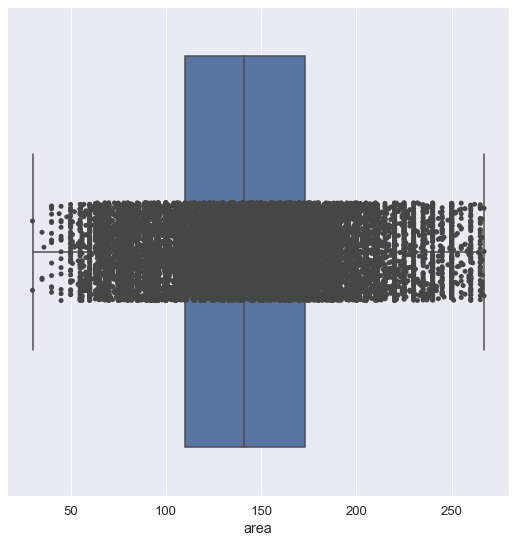

In [77]:
sns.boxplot(x='area', data=df)
sns.stripplot(x='area', data=df, color="#474646")

Fixing Price and area minimum because it is not logic to see apartment with 60,000 egp

In [78]:
upper=4_000_000
lower=150_000
upper_a=300
lower_a=50
flt_p=((df['price']<upper) & (df['price']>lower))
flt_a=(df['area']>lower_a) & (df['area']<upper_a)
df=df[((df['price']<upper) & (df['price']>lower)) & (df['area']>lower_a) & (df['area']<upper_a)]


Categorical Outliers

In [79]:
df['level'].value_counts(normalize=True,sort=True)

2          0.202953
3          0.169049
1          0.153743
Ground     0.118790
4          0.100517
5          0.079676
6          0.041828
Highest    0.035749
7          0.026812
8          0.024641
9          0.023809
10         0.022434
Name: level, dtype: float64

In [80]:
df['bedrooms'].value_counts(normalize=True,sort=True)

3      0.662409
2      0.308680
4      0.018381
1      0.007599
5      0.001664
6      0.000651
10     0.000181
7      0.000145
8      0.000109
10+    0.000109
9      0.000072
Name: bedrooms, dtype: float64

In [81]:
df['location'].value_counts(normalize=False,sort=True).index

Index(['New Cairo - El Tagamoa', 'Madinaty', 'Gesr Al Suez', 'Badr City',
       'Heliopolis', 'Ain Shams', 'Mokattam', 'Zahraa Al Maadi', 'Nasr City',
       'Rehab City', 'Helwan', 'Mostakbal City', 'Helmeyat El Zaytoun',
       'Maadi', 'New Capital City', 'Downtown Cairo', 'Shorouk City', 'Shubra',
       'Katameya', 'Sheraton', 'Salam City', 'Hadayek al-Kobba', 'New Nozha',
       'Hadayek Helwan', 'Marg', 'Obour City', 'Matareya', 'New Heliopolis',
       'Dar al-Salaam', 'Ezbet El Nakhl', '15 May City', 'Zawya al-Hamra',
       'Waili', 'Sayeda Zeinab', 'Abasiya', 'Al Manial', 'Almazah',
       'Al Amiriyyah', 'Zamalek', 'Basateen'],
      dtype='object')

In [82]:
imp_locations = ['New Cairo - El Tagamoa', 'Madinaty', 'Badr City', 'Heliopolis',
       'Gesr Al Suez', 'Rehab City', 'Mokattam', 'Nasr City', 'Ain Shams',
       'Zahraa Al Maadi', 'Helwan']

In [83]:
df['location'] = df['location'].apply(lambda loc: 'Other' if loc not in imp_locations else loc)

C:\Users\Commandor\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [84]:
df['location'].value_counts()

New Cairo - El Tagamoa    8536
Other                     7767
Madinaty                  2249
Gesr Al Suez              1374
Badr City                 1362
Heliopolis                1037
Ain Shams                  957
Mokattam                   925
Zahraa Al Maadi            924
Nasr City                  919
Rehab City                 868
Helwan                     719
Name: location, dtype: int64

In [85]:
filt = df['bedrooms'].apply(lambda x: x in ['1','5','6','7','8','9','10','10+'])
filt

0        False
1        False
3        False
4        False
5        False
         ...  
37703    False
37704    False
37706    False
37707    False
37708    False
Name: bedrooms, Length: 27637, dtype: bool

In [86]:
outliers = df[filt].index
df.drop(outliers, inplace = True)


C:\Users\Commandor\AppData\Roaming\Python\Python37\site-packages\pandas\core\frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [87]:
df['bedrooms'].value_counts()

3    18307
2     8531
4      508
Name: bedrooms, dtype: int64

In [88]:
df['compound'].value_counts(sort=True).index


Index(['Not in Compound', 'Jewar', 'Madinaty', 'Beit Al Watan', 'Sama',
       'L’Avenir', 'Makany', 'Andalus', 'Greens', 'The Key',
       ...
       'Quattro', 'Rock Ville', 'Paradise', 'Creek Park', 'Porto Heliopolis',
       'Sky Capital View', 'Wahet El Ryhan', 'Rayhanah Plaza', 'Emerald Park',
       'Odyssia'],
      dtype='object', length=257)

In [89]:
comp=['Not in Compound', 'Jewar', 'Madinaty', 'Sama', 'Beit Al Watan',
       'L’Avenir', 'Eastown', 'Makany', 'Mivida', 'Mountain View iCity']

df['compound'] = df['compound'].apply(lambda loc: 'Other' if loc not in comp else loc)
df['compound'].value_counts()

C:\Users\Commandor\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


Not in Compound        12592
Other                   6187
Jewar                   3808
Madinaty                1700
Beit Al Watan            985
Sama                     853
L’Avenir                 425
Makany                   291
Mountain View iCity      222
Eastown                  221
Mivida                    62
Name: compound, dtype: int64

In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27346 entries, 0 to 37708
Data columns (total 34 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   title                        27346 non-null  object        
 1   date                         27346 non-null  datetime64[ns]
 2   location                     27346 non-null  object        
 3   compound                     27346 non-null  object        
 4   type                         27346 non-null  object        
 5   price                        27346 non-null  int32         
 6   area                         27346 non-null  int32         
 7   bedrooms                     27346 non-null  object        
 8   level                        27346 non-null  object        
 9   furnished                    20253 non-null  object        
 10  price_type                   27346 non-null  object        
 11  bathrooms                    27346 non-nu

change furnished and not furnished values to 0 and 1

In [91]:
df['furnished'].replace('No',0,inplace = True)
df['furnished'].replace('Yes',1,inplace = True)

C:\Users\Commandor\AppData\Roaming\Python\Python37\site-packages\pandas\core\generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


change values of area to numeric                                                                                                                                                                                                                           
make column meter price which is calculation of price over area

In [92]:
df["area"] = [float(str(i).replace(",", "")) for i in df["area"]]
df['area']=df['area'].astype(int)

df['meterprice']=df['price']/df['area']
df['meterprice']=df['meterprice'].astype(int)
df

C:\Users\Commandor\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Commandor\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Commandor\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See th

,title,date,location,compound,type,price,area,bedrooms,level,furnished,...,landline,pets_allowed,covered_parking,private_garden,pool,maids_room,central_ac_heating,built_in_kitchen_appliances,month,meterprice
0,شقة للبيع بسكن مصر الاندلس مسلسل 1,2022-03-20,New Cairo - El Tagamoa,Other,Apartment,175000,115,3,3,0.0,...,1,1,1,1,0,0,0,0,3,1521
1,سكن مصر الأندلس مرحله ١ للبيع شقه دور اول ١١٥,2022-05-06,New Cairo - El Tagamoa,Other,Apartment,180000,115,3,1,0.0,...,0,0,0,0,0,0,0,0,5,1565
3,شقة للبيع بمدينة عمر بن الخطاب - آخر جسر السويس,2022-05-18,Gesr Al Suez,Not in Compound,Apartment,450000,135,3,7,0.0,...,0,0,0,0,0,0,0,0,5,3333
4,لسرعه البيع شقه سكن مصر التجمع التالت,2022-05-20,New Cairo - El Tagamoa,Other,Apartment,160000,115,3,2,0.0,...,0,0,0,0,0,0,0,0,5,1391
5,سكن مصر الأندلس ١١٥م للبيع بالمرحلة الاولى است...,2022-05-20,New Cairo - El Tagamoa,Other,Apartment,190000,115,3,1,0.0,...,0,0,0,0,0,0,0,0,5,1652
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37703,شقه للبيع تمليك مدينه ١٥ مايو,2022-04-22,Other,Not in Compound,Apartment,580000,110,2,4,0.0,...,0,0,0,0,0,0,0,0,4,5272
37704,شقة للبيع إمتداد مدينة 15 مايو مساحة 125م,2022-05-20,Other,Not in Compound,Apartment,550000,125,3,2,NaN,...,0,0,0,0,0,0,0,0,5,4400
37706,شقه للبيع,2022-03-20,Other,Jewar,Apartment,470000,80,2,5,0.0,...,0,0,0,0,0,0,0,0,3,5875
37707,للبيع,2022-03-20,Other,Not in Compound,Apartment,470000,100,2,4,0.0,...,1,1,0,1,0,0,0,0,3,4700


Change the meter price to the mean meterprice per location 

In [95]:
df

,title,date,location,compound,type,price,area,bedrooms,level,furnished,...,landline,pets_allowed,covered_parking,private_garden,pool,maids_room,central_ac_heating,built_in_kitchen_appliances,month,meterprice
0,شقة للبيع بسكن مصر الاندلس مسلسل 1,2022-03-20,New Cairo - El Tagamoa,Other,Apartment,175000,115,3,3,0.0,...,1,1,1,1,0,0,0,0,3,1521.0
1,سكن مصر الأندلس مرحله ١ للبيع شقه دور اول ١١٥,2022-05-06,New Cairo - El Tagamoa,Other,Apartment,180000,115,3,1,0.0,...,0,0,0,0,0,0,0,0,5,1565.0
3,شقة للبيع بمدينة عمر بن الخطاب - آخر جسر السويس,2022-05-18,Gesr Al Suez,Not in Compound,Apartment,450000,135,3,7,0.0,...,0,0,0,0,0,0,0,0,5,3333.0
4,لسرعه البيع شقه سكن مصر التجمع التالت,2022-05-20,New Cairo - El Tagamoa,Other,Apartment,160000,115,3,2,0.0,...,0,0,0,0,0,0,0,0,5,1391.0
5,سكن مصر الأندلس ١١٥م للبيع بالمرحلة الاولى است...,2022-05-20,New Cairo - El Tagamoa,Other,Apartment,190000,115,3,1,0.0,...,0,0,0,0,0,0,0,0,5,1652.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37703,شقه للبيع تمليك مدينه ١٥ مايو,2022-04-22,Other,Not in Compound,Apartment,580000,110,2,4,0.0,...,0,0,0,0,0,0,0,0,4,5272.0
37704,شقة للبيع إمتداد مدينة 15 مايو مساحة 125م,2022-05-20,Other,Not in Compound,Apartment,550000,125,3,2,NaN,...,0,0,0,0,0,0,0,0,5,4400.0
37706,شقه للبيع,2022-03-20,Other,Jewar,Apartment,470000,80,2,5,0.0,...,0,0,0,0,0,0,0,0,3,5875.0
37707,للبيع,2022-03-20,Other,Not in Compound,Apartment,470000,100,2,4,0.0,...,1,1,0,1,0,0,0,0,3,4700.0


In [103]:
df['meterprice']=df['meterprice'].astype(int)

C:\Users\Commandor\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [117]:
df['bathrooms']=df['bathrooms'].astype(str)
df['bedrooms']=df['bedrooms'].astype(str)
df['level']=df['level'].astype(str)
df['month']=df['month'].astype(str)

df['price']=df['price'].astype(int)
df['meterprice']=df['meterprice'].astype(int)

In [121]:
x=df.groupby('location')['meterprice'].mean().sort_values(ascending=False)
dict(x)
for i in x.keys():
    ind=df.index[df['location'] == i].tolist()

    for j in ind:
        df['meterprice'].iloc[j]=x[i]

C:\Users\Commandor\AppData\Roaming\Python\Python37\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [123]:
df['meterprice']

0        9665.364583
1        9665.364583
2        9665.364583
3        4037.587744
4        9665.364583
            ...     
28513    3771.994444
28514    3771.994444
28515    3771.994444
28516    3771.994444
28517    3771.994444
Name: meterprice, Length: 28518, dtype: float64

In [122]:
df['meterprice'].unique()

array([ 9665.36458333,  4037.58774373,  3856.45731109,  7820.7868676 ,
        5247.72093023,  9203.88140162,  8182.7705314 ,  4820.92491468,
        3159.78163772,  7403.10895884, 10715.27085714,  9658.1101083 ,
        6689.85638298,  9877.97692308,  6355.77      , 12889.86321381,
        8302.99443414,  8069.87987355,  6805.31707317,  9671.72322275,
        3178.73011364,  4046.77950713, 11008.63157895,  6179.62857143,
       10257.58404558,  3517.68789809,  5441.92038217,  3260.50819672,
        8938.640625  ,  6948.79761905,  3107.38829787,  3794.89036545,
        3958.0647482 ,  3771.99444444,  4287.        ,  9258.86666667,
        5792.83243243,  5005.48453608,  4365.22580645,  6879.68115942])

In [ ]:
# df = pd.read_csv('New_Data.csv')
# df

In [124]:
df.columns

Index(['date', 'location', 'compound', 'type', 'price', 'area', 'bedrooms',
       'level', 'furnished', 'price_type', 'bathrooms', 'payment_option',
       'amenities', 'delivery_term', 'delivery_date', 'down_payment',
       'electricity_meter', 'balcony', 'water_meter', 'elevator', 'security',
       'natural_gas', 'landline', 'pets_allowed', 'covered_parking',
       'private_garden', 'pool', 'maids_room', 'central_ac_heating',
       'built_in_kitchen_appliances', 'month', 'meterprice'],
      dtype='object')

In [ ]:
# df['bathrooms']=df['bathrooms'].astype(str)
# df['bedrooms']=df['bedrooms'].astype(str)
# df['level']=df['level'].astype(str)
# df['month']=df['month'].astype(str)


In [125]:
df['bathrooms'].value_counts()

2      8293
1      7277
3      5402
2      3996
1      2676
3       813
4        21
4         8
5         7
8         6
10        5
7         4
5         2
10+       2
9         2
7         1
6         1
10        1
6         1
Name: bathrooms, dtype: int64

In [126]:
real=[]
z=0
for i in df['compound'].unique():
    real.append(i)
    z=z+1
real
z

260

In [127]:
x=df['location'].unique()
list(x)
len(x)

40

In [128]:
df2 = df.copy(deep = True)


In [129]:
df['built_in_kitchen_appliances'].value_counts()

0    25719
1     2799
Name: built_in_kitchen_appliances, dtype: int64

In [130]:
x=df.iloc[500]

In [131]:
x[0:]

date                                                                   3/18/2022
location                                                  New Cairo - El Tagamoa
compound                                                                   Jewar
type                                                                   Apartment
price                                                                    1450000
area                                                                         172
bedrooms                                                                       3
level                                                                          4
furnished                                                                     No
price_type                                                        Not Negotiable
bathrooms                                                                      2
payment_option                                                              Cash
amenities                   

### Machine learning

### Here we made a manual feature selection to keep the important features to feed the model with it

In [132]:
df.drop([ 'date', 'type', 'amenities','furnished','price_type','delivery_date','down_payment'], axis=1, inplace=True)
df

,location,compound,price,area,bedrooms,level,bathrooms,payment_option,delivery_term,electricity_meter,...,landline,pets_allowed,covered_parking,private_garden,pool,maids_room,central_ac_heating,built_in_kitchen_appliances,month,meterprice
0,New Cairo - El Tagamoa,Sakan Masr,175000,115,3,3,1,Cash,Core & Shell,1,...,1,1,1,1,0,0,0,0,3,9665.364583
1,New Cairo - El Tagamoa,Sakan Masr,180000,115,3,1,1,Cash,Finished,1,...,0,0,0,0,0,0,0,0,5,9665.364583
2,New Cairo - El Tagamoa,Sakan Masr,150000,115,3,2,1,Cash,Finished,0,...,0,0,0,0,0,0,0,0,5,9665.364583
3,Gesr Al Suez,Not in Compound,450000,135,3,7,1,Cash,Finished,0,...,0,0,0,0,0,0,0,0,5,4037.587744
4,New Cairo - El Tagamoa,Sakan Masr,160000,115,3,2,1,Cash,Finished,0,...,0,0,0,0,0,0,0,0,5,9665.364583
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28513,15 May City,Not in Compound,580000,110,2,4,1,Cash,Finished,0,...,0,0,0,0,0,0,0,0,4,3771.994444
28514,15 May City,Not in Compound,550000,125,3,2,1,Cash,Core & Shell,0,...,0,0,0,0,0,0,0,0,5,3771.994444
28515,15 May City,Jewar,470000,80,2,5,1,Cash,Finished,1,...,0,0,0,0,0,0,0,0,3,3771.994444
28516,15 May City,Not in Compound,470000,100,2,4,1,Cash,Finished,1,...,1,1,0,1,0,0,0,0,3,3771.994444


In [133]:
df = pd.get_dummies(df, columns=['location', 'compound','bedrooms', 'month','level', 'bathrooms','payment_option','delivery_term'], drop_first=True)
df

,price,area,electricity_meter,balcony,water_meter,elevator,security,natural_gas,landline,pets_allowed,...,bathrooms_5,bathrooms_6,bathrooms_7,bathrooms_8,bathrooms_9,payment_option_Cash or Installment,payment_option_Installment,delivery_term_Finished,delivery_term_Not Finished,delivery_term_Semi Finished
0,175000,115,1,1,1,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,180000,115,1,0,1,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,150000,115,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,450000,135,0,1,0,1,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,160000,115,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28513,580000,110,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
28514,550000,125,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
28515,470000,80,1,1,1,1,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
28516,470000,100,1,1,1,0,0,0,1,1,...,0,0,0,0,0,0,0,1,0,0


In [134]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
df

,price,area,electricity_meter,balcony,water_meter,elevator,security,natural_gas,landline,pets_allowed,...,bathrooms_5,bathrooms_6,bathrooms_7,bathrooms_8,bathrooms_9,payment_option_Cash or Installment,payment_option_Installment,delivery_term_Finished,delivery_term_Not Finished,delivery_term_Semi Finished
0,175000,115,1,1,1,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,180000,115,1,0,1,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,150000,115,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,450000,135,0,1,0,1,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,160000,115,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28513,580000,110,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
28514,550000,125,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
28515,470000,80,1,1,1,1,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
28516,470000,100,1,1,1,0,0,0,1,1,...,0,0,0,0,0,0,0,1,0,0


In [135]:
x = df.drop('price', axis=1)
y = df['price']

In [136]:
for i in df.columns:
    print(i)

price
area
electricity_meter
balcony
water_meter
elevator
security
natural_gas
landline
pets_allowed
covered_parking
private_garden
pool
maids_room
central_ac_heating
built_in_kitchen_appliances
meterprice
location_Abasiya
location_Ain Shams
location_Al Amiriyyah
location_Al Manial
location_Almazah
location_Badr City
location_Basateen
location_Dar al-Salaam
location_Downtown Cairo
location_Ezbet El Nakhl
location_Gesr Al Suez
location_Hadayek Helwan
location_Hadayek al-Kobba
location_Heliopolis
location_Helmeyat El Zaytoun
location_Helwan
location_Katameya
location_Maadi
location_Madinaty
location_Marg
location_Matareya
location_Mokattam
location_Mostakbal City
location_Nasr City
location_New Cairo - El Tagamoa
location_New Capital City
location_New Heliopolis
location_New Nozha
location_Obour City
location_Rehab City
location_Salam City
location_Sayeda Zeinab
location_Sheraton
location_Shorouk City
location_Shubra
location_Waili
location_Zahraa Al Maadi
location_Zamalek
location_Zawya

In [ ]:
df.isna().sum()

In [137]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

In [138]:
x_train

,area,electricity_meter,balcony,water_meter,elevator,security,natural_gas,landline,pets_allowed,covered_parking,...,bathrooms_5,bathrooms_6,bathrooms_7,bathrooms_8,bathrooms_9,payment_option_Cash or Installment,payment_option_Installment,delivery_term_Finished,delivery_term_Not Finished,delivery_term_Semi Finished
9621,182,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19517,135,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
7323,195,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19348,120,1,0,0,1,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
22501,120,1,0,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28426,68,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5991,160,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,1,0,0,0,0
21307,126,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15122,211,1,1,1,1,1,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [139]:
scaler= StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [141]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

models = {
    #'LR': LinearRegression(),
    #'DT': DecisionTreeRegressor(max_depth=200),#max_depth=180
    #'KNN': KNeighborsRegressor(),#n_neighbors=9
    #'SVM': SVR(), #kernel='rbf'
   # 'RF': RandomForestRegressor(n_estimators=100,max_depth=6),#n_estimators=200,max_depth=330
    'XGB': XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.8, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.1, max_delta_step=0,
             max_depth=6, min_child_weight=1,
             monotone_constraints='()', n_estimators=1000, n_jobs=-1,
             num_parallel_tree=2, predictor='auto', random_state=27,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=27,
             subsample=0.8, tree_method='exact', validate_parameters=1,
             verbosity=None)#n_estimators=200
}

for name, model in models.items():
    print(f'Training {name}...')
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    yt_pred = model.predict(x_train)

    print(f'Testing RMSE: {np.sqrt(mean_squared_error(y_test, y_pred))}')
    print(f'Testing MAE: {mean_absolute_error(y_test, y_pred)}')
    print(f'Testing R2: {r2_score(y_test, y_pred)}')
    print('-'*50)

    print(f'Training RMSE: {np.sqrt(mean_squared_error(y_train, yt_pred))}')
    print(f'Training MAE: {mean_absolute_error(y_train, yt_pred)}')
    print(f'Training R2: {r2_score(y_train, yt_pred)}')
    print('-'*50)

Training XGB...
Testing RMSE: 438946.64429525135
Testing MAE: 282451.03343925317
Testing R2: 0.7255318506085057
--------------------------------------------------
Training RMSE: 297992.46647659
Training MAE: 202423.6012046219
Training R2: 0.8759947117554369
--------------------------------------------------


### we have chosen XGB because of R2 

 XGB is better  in this problem ther error here is good comparing with human error, it's a hard problem to solve because it's a real data so i think this good and if we want to improve it we will need a deep learning model to solve this problem better


In [ ]:
x.drop(labels='price',inplace=True)

In [ ]:
x = np.array(x)
x = scaler.transform([x])
prediction = model.predict(x)
prediction


In [ ]:
df['price'].iloc[500]


dumb model and scaler to use it in web deployment

In [ ]:
import joblib
joblib.dump(scaler, 'scaler.h5')
joblib.dump(model, 'model.h5')
        

showing why not using XGB

In [ ]:
model2 = XGBRegressor()
model2.fit(x_train, y_train)
y_pred = model2.predict(x_test)
print(f'Testing RMSE: {np.sqrt(mean_squared_error(y_test, y_pred))}')
print(f'Testing MAE: {mean_absolute_error(y_test, y_pred)}')
print(f'Testing R2: {r2_score(y_test, y_pred)}')

In [ ]:
x=df.iloc[500]
type(x)

In [ ]:
x.drop(labels='price',inplace=True)

Here as we see the error is bigger than Decssion Tree

In [ ]:
x = np.array(x)

x = scaler.transform([x])

prediction = model2.predict(x)
prediction


In [ ]:
df['price'].iloc[500]


In [145]:
columns=list(df.columns)
columns

['price',
 'area',
 'electricity_meter',
 'balcony',
 'water_meter',
 'elevator',
 'security',
 'natural_gas',
 'landline',
 'pets_allowed',
 'covered_parking',
 'private_garden',
 'pool',
 'maids_room',
 'central_ac_heating',
 'built_in_kitchen_appliances',
 'meterprice',
 'location_Abasiya',
 'location_Ain Shams',
 'location_Al Amiriyyah',
 'location_Al Manial',
 'location_Almazah',
 'location_Badr City',
 'location_Basateen',
 'location_Dar al-Salaam',
 'location_Downtown Cairo',
 'location_Ezbet El Nakhl',
 'location_Gesr Al Suez',
 'location_Hadayek Helwan',
 'location_Hadayek al-Kobba',
 'location_Heliopolis',
 'location_Helmeyat El Zaytoun',
 'location_Helwan',
 'location_Katameya',
 'location_Maadi',
 'location_Madinaty',
 'location_Marg',
 'location_Matareya',
 'location_Mokattam',
 'location_Mostakbal City',
 'location_Nasr City',
 'location_New Cairo - El Tagamoa',
 'location_New Capital City',
 'location_New Heliopolis',
 'location_New Nozha',
 'location_Obour City',
 'loca

values before dummies

In [144]:
y=df2['compound'].unique()
list(y)
len(y)

260

values after dummies

In [146]:
count=0
for i in columns:
    if 'compound' in i:
        count=count+1
count    

259

function to get deployment value truth tables (value code in file dummies.py in folder web deployment)                        

dummies_compound values

In [149]:
ze4=[]
ze4=columns[columns.index('compound_90 Avenue'):columns.index('bedrooms_10')]
comp={}
c=0
for i in ze4:
    x=df[df[i]==1].iloc[0][ze4]
    comp[i]=x.values.tolist()
    c=c+1
comp

ValueError: cannot reindex from a duplicate axis

dummies_location values

In [148]:
ze4=[]
ze4=columns[columns.index('location_Abasiya'):columns.index('compound_90 Avenue')]
comp={}
c=0
for i in ze4:
    x=df[df[i]==1].iloc[0][ze4]
    comp[i]=x.values.tolist()
    c=c+1
comp

{'location_Abasiya': [1.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0],
 'location_Ain Shams': [0.0,
  1.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0],
 'location_Al Amiriyyah': [0.0,
  0.0,
  1.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0],
 'location_Al Manial': [0.0,
  0.0,
  0.0,
  1.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0

In [ ]:
len(comp['location_Abasiya'])


In [ ]:
df

In [ ]:
ze4=[]
ze4=columns[columns.index('delivery_term_Finished'):]
comp={}
c=0
for i in ze4:
    x=df[df[i]==1].iloc[0][ze4]
    comp[i]=x.values.tolist()
    c=c+1
ze4

In [ ]:
ze42=[]
for i in real:
    i="compound_"+i
    ze42.append(i)

In [ ]:
df2['location'][0]

In [ ]:
ze42

difference between list before dummies and list after dummies to get the value with the truth table full of zeros

In [ ]:
res = [x for x in ze42 + ze4 if x not in ze42 or x not in ze4]

print(res)

In [ ]:
# df.to_csv (r'New_Data.csv', index = False, header=True,encoding='utf-8') 


In [ ]:
# col1_without = pd.get_dummies(df, columns=['location', 'compound','bedrooms', 'month','level', 'bathrooms','payment_option','delivery_term','delivery_date','price_type']).columns
# list(col1_without)

# col2 = pd.get_dummies(df, columns=['location', 'compound','bedrooms', 'month','level', 'bathrooms','payment_option','delivery_term','delivery_date','price_type'],drop_first=True).columns
# list(col2)

# res=[]
# for i in col1_without:
#     if i not in clo2:
#         res.append(i)

In [ ]:
# df.to_csv (r'New_Data_drop_out.csv', index = False, header=True,encoding='utf-8') 
